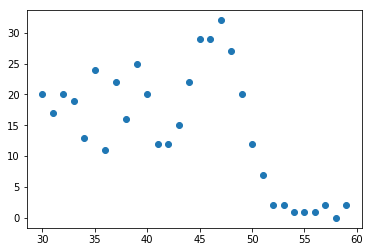

In [5]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/100_1113.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)
plotFrom = 30
plotTo = 60
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 46.1406679    2.21293835 165.4905064  -17.70240824 -41.19070347] [inf inf inf inf inf]


/home/dumbo/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


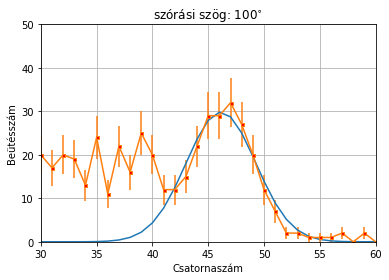

In [20]:
error = np.sqrt(values)

startVal = 41
endVal = 51

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([32.,6., 47., .9, -.1])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 100$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)
plt.savefig('../plots/withbackground/100_1113fit.png')

print(params, perr)

In [4]:
np.savetxt('../gaussfits/withbackground/100_1113fit.dat', (params, perr))